In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style('whitegrid')
sns.set_context('talk')

In [8]:
import pandas as pd

date = '20240930'
fname = f'../DATA/{date[:-2]}/{date}.csv'

df = pd.read_csv(fname)
# df = df[(np.abs(df['current_mean']) < 1)]
# df['Az'] = np.where(df['Az'] < 0, 180, df['Az'])

In [36]:
df

,tmid,date,seq_id,exp_time_cmd,exp_time,filter,Alt,Az,current_mean,current_std,alt_std,az_std,alt_rank,az_rank,electrometer_filename,flag,mount_filename
0,20240930225218,2024-09-30 22:52:18.745279,1,NaN,0.929854,Empty,82.03493,0.00000,-3.210886e-07,2.984310e-09,NaN,NaN,1,1,/home/estevesjh/Documents/twilightMonitor/DATA...,False,/home/estevesjh/Documents/twilightMonitor/DATA...
1,20240930225747,2024-09-30 22:57:47.656052,2,NaN,0.929487,Empty,65.86891,0.00000,-1.005071e-07,4.375280e-10,NaN,NaN,1,1,/home/estevesjh/Documents/twilightMonitor/DATA...,False,/home/estevesjh/Documents/twilightMonitor/DATA...
2,20240930225752,2024-09-30 22:57:52.341048,3,NaN,0.929386,Empty,56.23908,0.00000,-9.549898e-08,1.289456e-10,NaN,NaN,2,1,/home/estevesjh/Documents/twilightMonitor/DATA...,False,/home/estevesjh/Documents/twilightMonitor/DATA...
3,20240930225756,2024-09-30 22:57:56.994287,4,NaN,0.929893,Empty,47.22046,0.00000,-9.285032e-08,1.192964e-10,NaN,NaN,3,1,/home/estevesjh/Documents/twilightMonitor/DATA...,False,/home/estevesjh/Documents/twilightMonitor/DATA...
4,20240930225801,2024-09-30 22:58:01.669337,5,NaN,0.929384,Empty,38.88640,0.00000,-9.631141e-08,1.845048e-10,NaN,NaN,4,1,/home/estevesjh/Documents/twilightMonitor/DATA...,False,/home/estevesjh/Documents/twilightMonitor/DATA...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,20240930234445,2024-09-30 23:44:45.383163,265,NaN,0.929406,Empty,56.04635,172.45782,-1.980000e+37,3.960000e+37,NaN,NaN,4,7,/home/estevesjh/Documents/twilightMonitor/DATA...,False,/home/estevesjh/Documents/twilightMonitor/DATA...
265,20240930234450,2024-09-30 23:44:50.615321,266,NaN,0.930113,Empty,46.79162,172.45782,-9.900000e+37,0.000000e+00,NaN,NaN,5,7,/home/estevesjh/Documents/twilightMonitor/DATA...,False,/home/estevesjh/Documents/twilightMonitor/DATA...
266,20240930234455,2024-09-30 23:44:55.901126,267,NaN,0.929532,Empty,37.30368,172.45782,-9.900000e+37,0.000000e+00,NaN,NaN,6,7,/home/estevesjh/Documents/twilightMonitor/DATA...,False,/home/estevesjh/Documents/twilightMonitor/DATA...
267,20240930234509,2024-09-30 23:45:09.925144,268,13.17408,13.433203,Empty,89.34915,172.45782,-1.738493e-11,5.177806e-12,NaN,NaN,0,7,/home/estevesjh/Documents/twilightMonitor/DATA...,True,/home/estevesjh/Documents/twilightMonitor/DATA...


In [37]:
# mask = (df['flag'] == 'False') | (data['flag']=='test1') | (data['flag']=='test3')
# mask = (df['flag']=='test4')
# data = df.loc[mask].copy()
# len(data)

In [9]:
import pandas as pd
import numpy as np

def check_repeatability(df):
    """
    Check repeatability by grouping data into azimuth bins, ranking Alt values,
    and computing mean and std deviation for each rank.
    
    Parameters:
    df (DataFrame): DataFrame containing 'Az' and 'Alt' columns.
    
    Returns:
    DataFrame: A new DataFrame with the mean and std of Alt for each rank within each azimuth bin.
    """
    df = df.dropna(subset=['Az', 'Alt'])
        
    # 1. Create 7 bins for Azimuth (0 to 180)
    az_bins = np.linspace(-5, 180, 8)  # 7 bins, 8 edges
    df['Az_bin'] = pd.cut(df['Az'], bins=az_bins, labels=False)

    # 2. Rank Altitude values within each azimuth bin (highest = 1, lowest = 6)
    df['Alt_rank'] = df.groupby('Az_bin')['Alt'].rank(ascending=False, method='first').astype(int)

    # 3. Compute mean and std of Alt values for each rank within each azimuth bin
#     result = df.groupby(['Az_bin', 'Alt_rank'])['Alt'].agg(['mean', 'std']).reset_index()

    # Rename columns for clarity
#     result.columns = ['Az_bin', 'Alt_rank', 'Alt_mean', 'Alt_std']

    # Output the result
    return df

# Example usage:
result_df = check_repeatability(df[['Alt','Az']])
print(result_df)


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
# np.count_nonzero(np.isnan(data['Az']))

In [ ]:
result_df.groupby(['Alt_rank'])['Alt'].agg(['mean', 'std']).reset_index()

In [4]:
import pandas as pd
import numpy as np

def check_repeatability_grouped(df):
    """
    Check repeatability by grouping data into azimuth bins, and grouping Alt pointings based on their sequence.
    
    Parameters:
    df (DataFrame): DataFrame containing 'Az' and 'Alt' columns.
    
    Returns:
    DataFrame: A new DataFrame with the mean and std of Alt for each point within each azimuth bin.
    """
    
    # 1. Create 7 bins for Azimuth (0 to 180)
    az_bins = np.linspace(0, 180, 8)  # 7 bins, 8 edges
    df['Az_bin'] = pd.cut(df['Az'], bins=az_bins, labels=False)

    # 2. Group data by Az_bin and create a sequential index for each Alt point in every Azimuth bin.
    df['Alt_point'] = df.groupby('Az_bin').cumcount() % 6 + 1

    # 3. Compute mean and std of Alt values for each Alt point within each azimuth bin
    result = df.groupby(['Alt_point'])['Alt'].agg(['mean', 'std','count']).reset_index()

    # Rename columns for clarity
#     result.columns = ['Az_bin', 'Alt_point', 'Alt_mean', 'Alt_std']

    # Output the result
    return result

# Example usage:
# result_df = check_repeatability_grouped(df)
# print(result_df)


In [5]:
res = check_repeatability_grouped(data)
res

NameError: name 'data' is not defined

In [6]:
def plot_repeatability(df, color='k', label='cycle1'):
    res = check_repeatability_grouped(df)
    plt.scatter(res['mean'], res['std'], color=color, s=50, label=label)
    plt.ylabel('Repeatability [deg]')
    plt.xlabel('Elevation [deg]')
    plt.xlim(30,90)
    plt.legend()

def plot_repeatability2(df, color='k', label='cycle1'):
    res = check_repeatability_grouped(df)
    plt.errorbar(res['Alt_point'], res['mean'], fmt='o', ls=None, yerr=res['std'], color=color, label=label)
    plt.xlabel('Point Step')
    plt.ylabel('Elevation [deg]')
#     plt.xlim(30,90)
    plt.legend()


In [7]:
labels = ['test2','test3','test4']
colors = ['r','k','b']
i=0
for l in labels:
    mask = (df['flag']==l)
    data = df.loc[mask].copy()
    plot_repeatability(data, color=colors[i],label=l)
    i+=1

NameError: name 'df' is not defined

In [8]:
i=0
for l in labels:
    mask = (df['flag']==l)
    data = df.loc[mask].copy()
    plot_repeatability2(data, color=colors[i],label=l)
    i+=1

NameError: name 'df' is not defined

In [9]:
import matplotlib.pyplot as plt

def plot_histograms_by_alt_point(df):
    """
    Plots histograms of Alt values for each Alt_point in a 3x2 mosaic layout.
    
    Parameters:
    df (DataFrame): DataFrame containing 'Alt_point' and 'Alt' columns.
    """
    # Define the mosaic layout: 3 rows and 2 columns
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()  # Flatten the 3x2 grid into a 1D array for easy iteration

    # Loop over each Alt_point and create a histogram
    for i, alt_point in enumerate(sorted(df['Alt_point'].unique())):
        ax = axes[i]
        
        # Filter the data for the current Alt_point
        alt_data = df[df['Alt_point'] == alt_point]['Alt']
        
        # Plot the histogram
        ax.hist(alt_data, bins=10, alpha=0.7, color='blue', edgecolor='black')
        ax.set_title(f'Histogram for Alt_point {alt_point}')
        ax.set_xlabel('Altitude')
        ax.set_ylabel('Frequency')

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_histograms_by_alt_point(df)


In [10]:
date = '20241003'
fname = f'../DATA/{date[:-2]}/{date}.csv'

df = pd.read_csv(fname)
# df = df[(np.abs(df['current_mean']) < 1) & (df['Alt']>0) & np.abs(df['Az'])>0]
# df['Az'] = np.where(df['Az'] < 0, 180, df['Az'])
df['Alt_point'] = np.array(df.alt_rank).astype(np.int64)

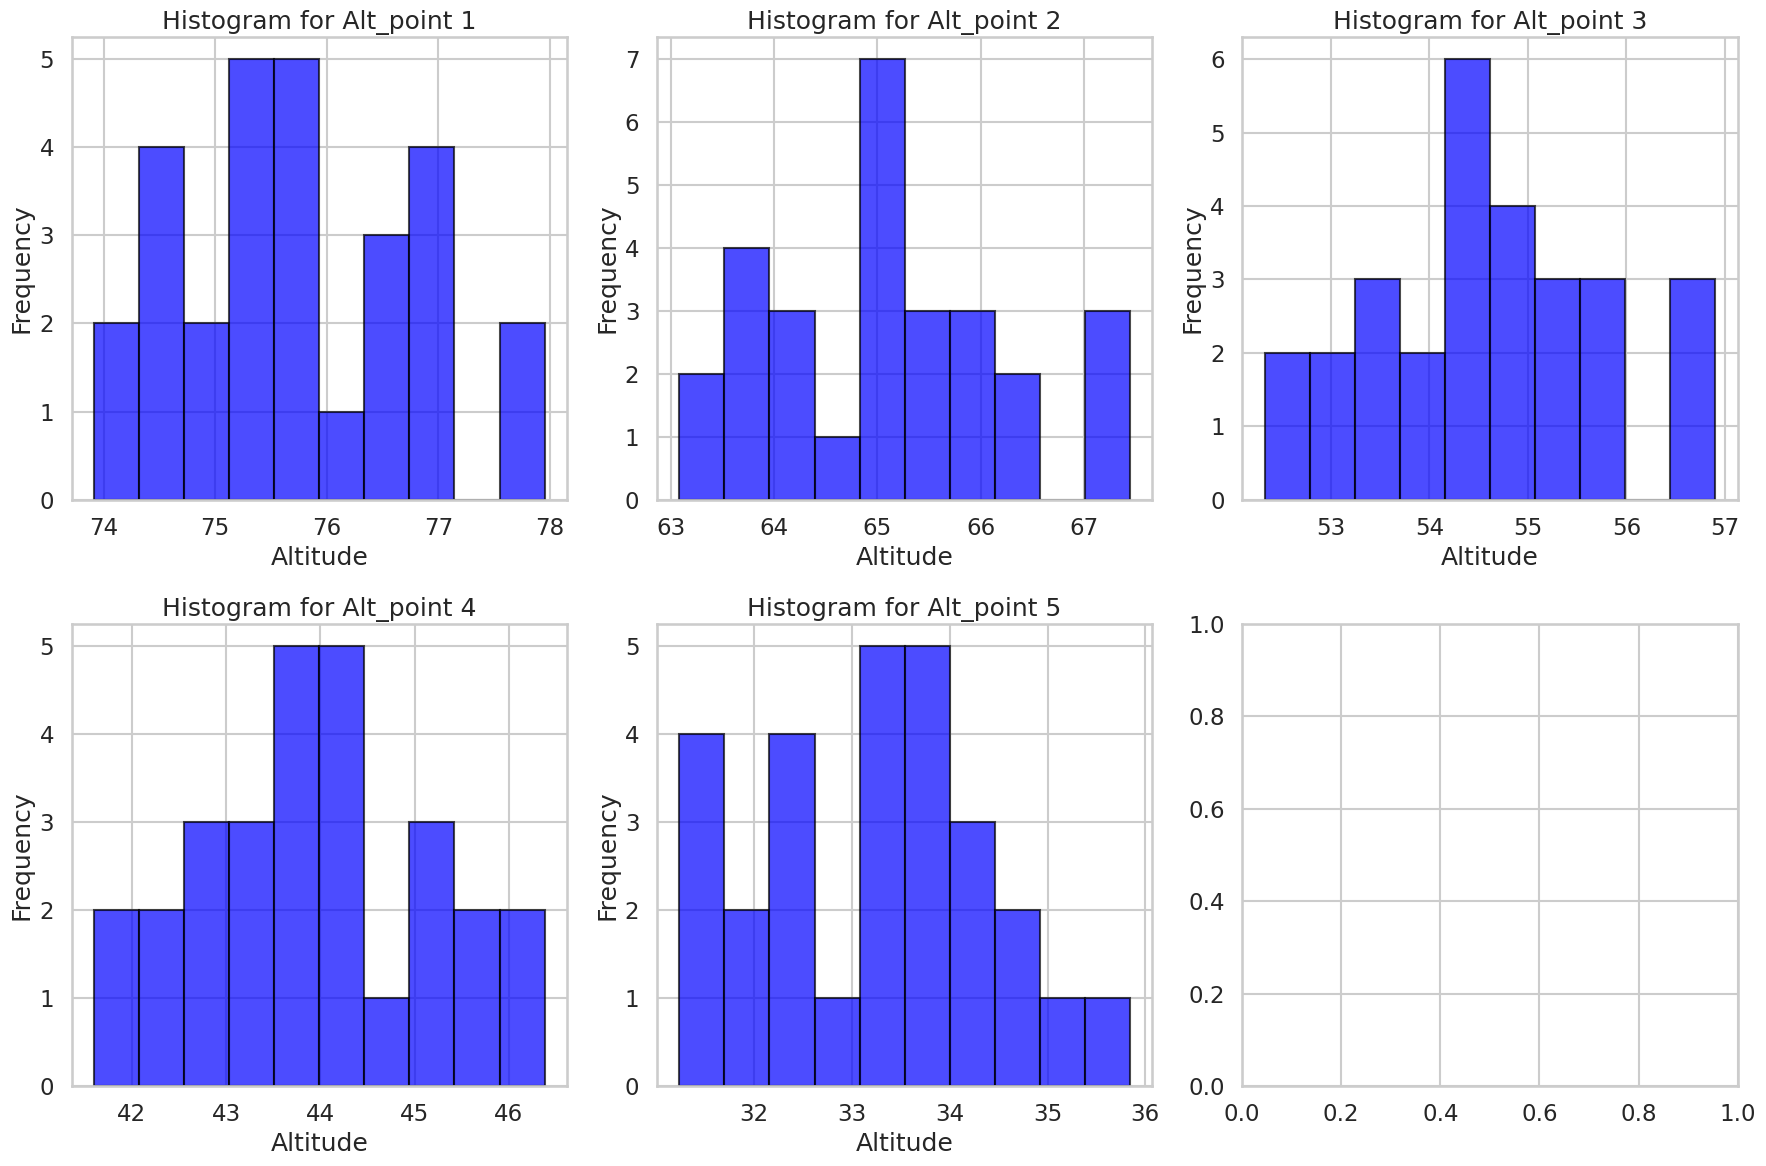

In [11]:
plot_histograms_by_alt_point(df[df['Alt_point']>0])

In [12]:
def check_repeatability_grouped(df, key='Alt'):
    """
    Check repeatability by grouping data into azimuth bins, and grouping Alt pointings based on their sequence.
    
    Parameters:
    df (DataFrame): DataFrame containing 'Az' and 'Alt' columns.
    
    Returns:
    DataFrame: A new DataFrame with the mean and std of Alt for each point within each azimuth bin.
    """
    result = df.groupby([key.lower()+'_rank'])[key].agg(['mean', 'std','count']).reset_index()
    return result

def plot_repeatability3(df, key='Alt', color='k', label='cycle1'):
    labelDict = {'Alt': 'Elevation', 'Az':'Azimuth'}
    res = check_repeatability_grouped(df, key)
    plt.errorbar(res[key.lower()+'_rank'], res['mean'], fmt='o', ls=None, yerr=res['std'], color=color, label=label)
#     plt.scatter(df[key+'_rank'], df[key], s=20, c=df['Az'])
    plt.xlabel('Point Step')
    plt.ylabel('%s [deg]'%labelDict[key])
#     plt.xlim(30,90)
    plt.legend()

In [13]:
check_repeatability_grouped(df, key='Alt')

,alt_rank,mean,std,count
0,0,72.252982,1.349433,28
1,1,75.708828,1.075130,28
2,2,65.082471,1.162089,28
3,3,54.571594,1.196769,28
4,4,43.940348,1.284940,28
5,5,33.214729,1.177818,28


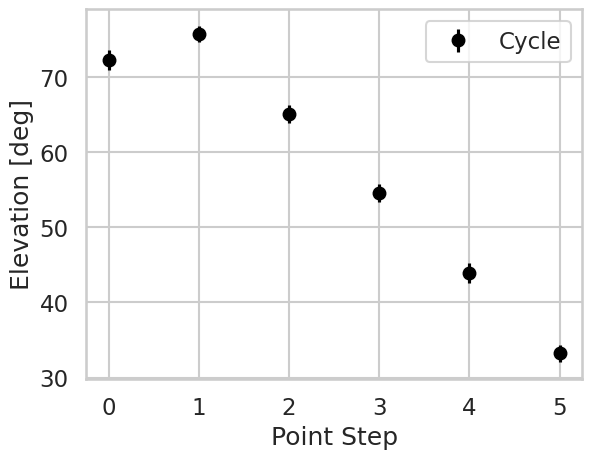

In [14]:
colors = ['r','k','b']

plot_repeatability3(df, color=colors[1],label='Cycle')

In [15]:
def check_brightness_stability(df):
    """
    Check repeatability by grouping data into azimuth bins, and grouping Alt pointings based on their sequence.
    
    Parameters:
    df (DataFrame): DataFrame containing 'Az' and 'Alt' columns.
    
    Returns:
    DataFrame: A new DataFrame with the mean and std of Alt for each point within each azimuth bin.
    """
    result = df.groupby(['Alt_point'])['current_mean'].agg(['mean', 'std','count']).reset_index()

    return result

def plot_brightness_stability(df, color='k', label='cycle1'):
    res = check_brightness_stability(df)
    plt.errorbar(res['Alt_point'], np.abs(res['mean'])*1e6, fmt='o', ls=None, yerr=res['std']*1e6, color=color, label=label)
    plt.scatter(df['Alt_point'], np.abs(df['current_mean'])*1e6, s=20, c=df['Az'])
    plt.xlabel('Point Step')
    plt.ylabel('Brighness [$\mu$ Amp]')
#     plt.xlim(30,90)
    plt.legend()

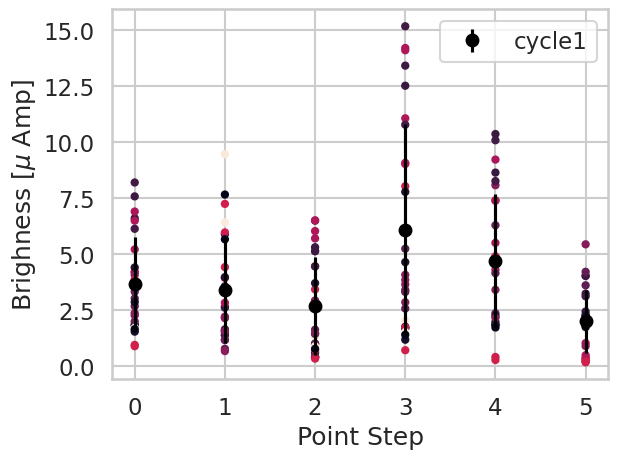

In [16]:
plot_brightness_stability(df)

In [17]:
plt.plot(np.flip(d['time'],0), d['CURR'])

NameError: name 'd' is not defined

In [18]:
efiles = df[df['flag']==True].electrometer_filename.to_numpy()
mfiles = df[df['flag']==True].mount_filename.to_numpy()

In [19]:
d = np.load(efiles[-1])
d

array([( 0.012248, -1.644456e-07), ( 0.113837, -1.643148e-07),
       ( 0.215268, -1.648906e-07), ( 0.316633, -1.658226e-07),
       ( 0.41797 , -1.671996e-07), ( 0.519284, -1.690634e-07),
       ( 0.639623, -1.719277e-07), ( 0.740953, -1.748874e-07),
       ( 0.84226 , -1.784858e-07), ( 0.943538, -1.827912e-07),
       ( 1.044871, -1.879219e-07), ( 1.14617 , -1.936490e-07),
       ( 1.24751 , -2.000884e-07), ( 1.348887, -2.070894e-07),
       ( 1.452724, -2.147460e-07), ( 1.554097, -2.226600e-07),
       ( 1.655384, -2.307380e-07), ( 1.773314, -2.404250e-07),
       ( 1.874651, -2.487710e-07), ( 1.975951, -2.566720e-07),
       ( 2.077267, -2.636410e-07), ( 2.17858 , -2.697950e-07),
       ( 2.279917, -2.752580e-07), ( 2.381272, -2.800190e-07),
       ( 2.48261 , -2.840020e-07), ( 2.58393 , -2.871030e-07),
       ( 2.685313, -2.894010e-07), ( 2.786686, -2.909780e-07),
       ( 2.90698 , -2.920010e-07), ( 3.008325, -2.920960e-07),
       ( 3.109652, -2.914950e-07), ( 3.210999, -2.90166

In [36]:
df['logMean'] = np.log10(np.abs(df['current_mean']))

In [38]:
df[df.logMean < -11]


,tmid,date,seq_id,exp_time_cmd,exp_time,filter,Alt,Az,current_mean,current_std,alt_std,az_std,alt_rank,az_rank,electrometer_filename,flag,mount_filename,Alt_point,logMean
